In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
#download and import kaggle to extract the data
!pip install kaggle
import kaggle

     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     -------------- ------------------------- 30.7/82.7 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 82.7/82.7 kB 928.9 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105795 sha256=98efb530072f9991595983a23518c7655609d3d0f84d77daecb3edc61e9eef71
  Stored in directory: c:\users\manju\appdata\local\pip\cache\wheels\46\d2\26\84d0a1acdb9c6baccf7d28cf06962ec80529fe1ad938489983
Successfully built kaggle


In [9]:
#extract the files from kaggle
!kaggle datasets download samruddhi4040/online-sales-data -f Orders.csv

Dataset URL: https://www.kaggle.com/datasets/samruddhi4040/online-sales-data
License(s): CC0-1.0




  0%|          | 0.00/22.7k [00:00<?, ?B/s]
100%|##########| 22.7k/22.7k [00:00<00:00, 82.0kB/s]
100%|##########| 22.7k/22.7k [00:00<00:00, 81.7kB/s]


In [11]:
!kaggle datasets download samruddhi4040/online-sales-data -f Details.csv

Dataset URL: https://www.kaggle.com/datasets/samruddhi4040/online-sales-data
License(s): CC0-1.0




  0%|          | 0.00/61.9k [00:00<?, ?B/s]
100%|##########| 61.9k/61.9k [00:00<00:00, 105kB/s]
100%|##########| 61.9k/61.9k [00:00<00:00, 105kB/s]


In [15]:
#Loading the datasets
df1 = pd.read_csv('Orders.csv')
df1.head()

,Order ID,Order Date,CustomerName,State,City
0,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura
1,B-25993,03-02-2018,Madhav,Delhi,Delhi
2,B-25973,24-01-2018,Madan Mohan,Uttar Pradesh,Mathura
3,B-25923,27-12-2018,Gopal,Maharashtra,Mumbai
4,B-25757,21-08-2018,Vishakha,Madhya Pradesh,Indore


In [18]:
#Check if there any null values
df1.isnull().sum()

Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
dtype: int64

In [20]:
#Check if there any duplicate values
df1.duplicated().sum()

0

In [22]:
#Load the second dataset
df2 = pd.read_csv('Details.csv')
df2.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI
2,B-25955,2927,146,8,Furniture,Bookcases,EMI
3,B-26093,2847,712,8,Electronics,Printers,Credit Card
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card


In [24]:
#Check if there is any null or duplicate values
df2.isnull().sum()
df2.duplicated().sum()

0

In [26]:
df1.describe()

,Order ID,Order Date,CustomerName,State,City
count,500,500,500,500,500
unique,500,307,336,19,25
top,B-26055,24-11-2018,Shreya,Maharashtra,Indore
freq,1,7,6,94,71


In [44]:
#DATA CLEANING
#rename column names to lower case 
#df1.columns=df1.columns.str.lower()
#df2.column=df2.columns.str.lower()
df2.head(2)

,order id,amount,profit,quantity,category,sub-category,paymentmode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI


In [48]:
#Converting the order date column to date type
df1["order date"] = pd.to_datetime(df1["order date"], format="mixed")
df1["year"] = df1["order date"].dt.year
df1["month"] = df1["order date"].dt.month
df1.head()

,order id,order date,customername,state,city,year,month
0,B-26055,2018-10-03,Harivansh,Uttar Pradesh,Mathura,2018,10
1,B-25993,2018-03-02,Madhav,Delhi,Delhi,2018,3
2,B-25973,2018-01-24,Madan Mohan,Uttar Pradesh,Mathura,2018,1
3,B-25923,2018-12-27,Gopal,Maharashtra,Mumbai,2018,12
4,B-25757,2018-08-21,Vishakha,Madhya Pradesh,Indore,2018,8


In [50]:
#Merge two datasets on order id
df = pd.merge(df1,df2,on='order id',how='inner')
df.head()

,order id,order date,customername,state,city,year,month,amount,profit,quantity,category,sub-category,paymentmode
0,B-26055,2018-10-03,Harivansh,Uttar Pradesh,Mathura,2018,10,5729,64,14,Furniture,Chairs,EMI
1,B-26055,2018-10-03,Harivansh,Uttar Pradesh,Mathura,2018,10,671,114,9,Electronics,Phones,Credit Card
2,B-26055,2018-10-03,Harivansh,Uttar Pradesh,Mathura,2018,10,443,11,1,Clothing,Saree,COD
3,B-26055,2018-10-03,Harivansh,Uttar Pradesh,Mathura,2018,10,57,7,2,Clothing,Shirt,UPI
4,B-26055,2018-10-03,Harivansh,Uttar Pradesh,Mathura,2018,10,227,48,5,Clothing,Stole,COD


In [52]:
#Most sold category of product
#sales by category
category_sales = df.groupby('category')['amount'].sum().reset_index()
print(category_sales)

      category  amount
0     Clothing  144323
1  Electronics  166267
2    Furniture  127181


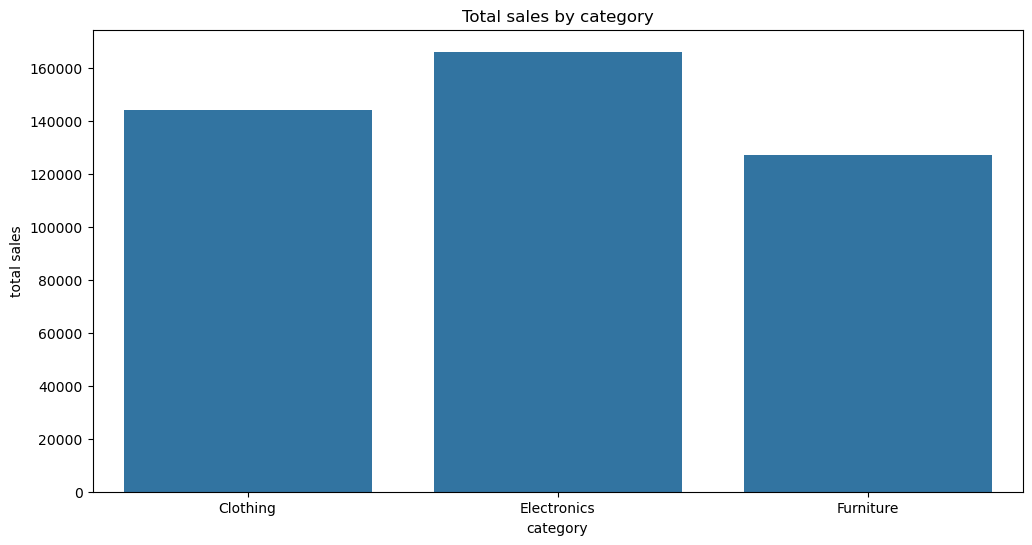

In [54]:
plt.figure(figsize=(12,6))
sns.barplot(x='category', y='amount', data=category_sales)
plt.title('Total sales by category')
plt.xlabel('category')
plt.ylabel('total sales')
plt.show()

In [64]:
#Most sold product in Electronics
electronics_df = df[df["category"]=="Electronics"]
subcategory_sales = electronics_df.groupby("sub-category")["amount"].sum().reset_index()
most_sold_products = subcategory_sales.sort_values(by="amount", ascending=False)

In [66]:
print(most_sold_products)

       sub-category  amount
3          Printers   59252
2            Phones   46119
1  Electronic Games   39168
0       Accessories   21728


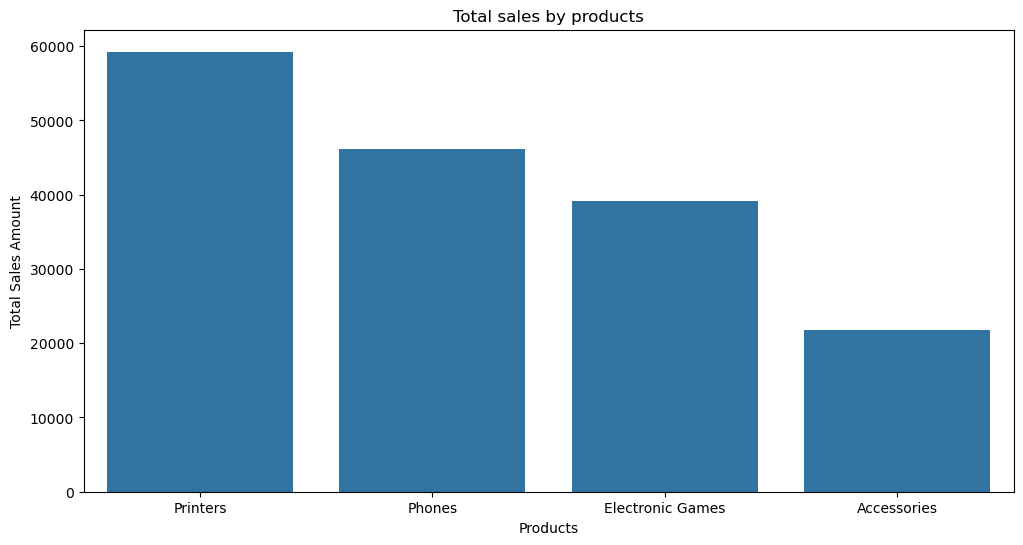

In [68]:
plt.figure(figsize=(12,6))
sns.barplot(x="sub-category",y="amount",data=most_sold_products)
plt.title("Total sales by products")
plt.xlabel("Products")
plt.ylabel("Total Sales Amount")
plt.show()

In [70]:
#Cites and states that have most sales
#sales by city
city_sales = df.groupby("city")["amount"].sum().reset_index().sort_values(by = 'amount', ascending = False)
#sales by state
state_sales = df.groupby("state")["amount"].sum().reset_index().sort_values(by = 'amount', ascending = False)

C:\Users\manju\AppData\Local\Temp\ipykernel_23264\1807713259.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='amount', y='city', data=city_sales.head(5), ax=axes[0], palette='viridis')
C:\Users\manju\AppData\Local\Temp\ipykernel_23264\1807713259.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='amount', y='state', data=state_sales.head(5), ax=axes[1], palette='viridis')


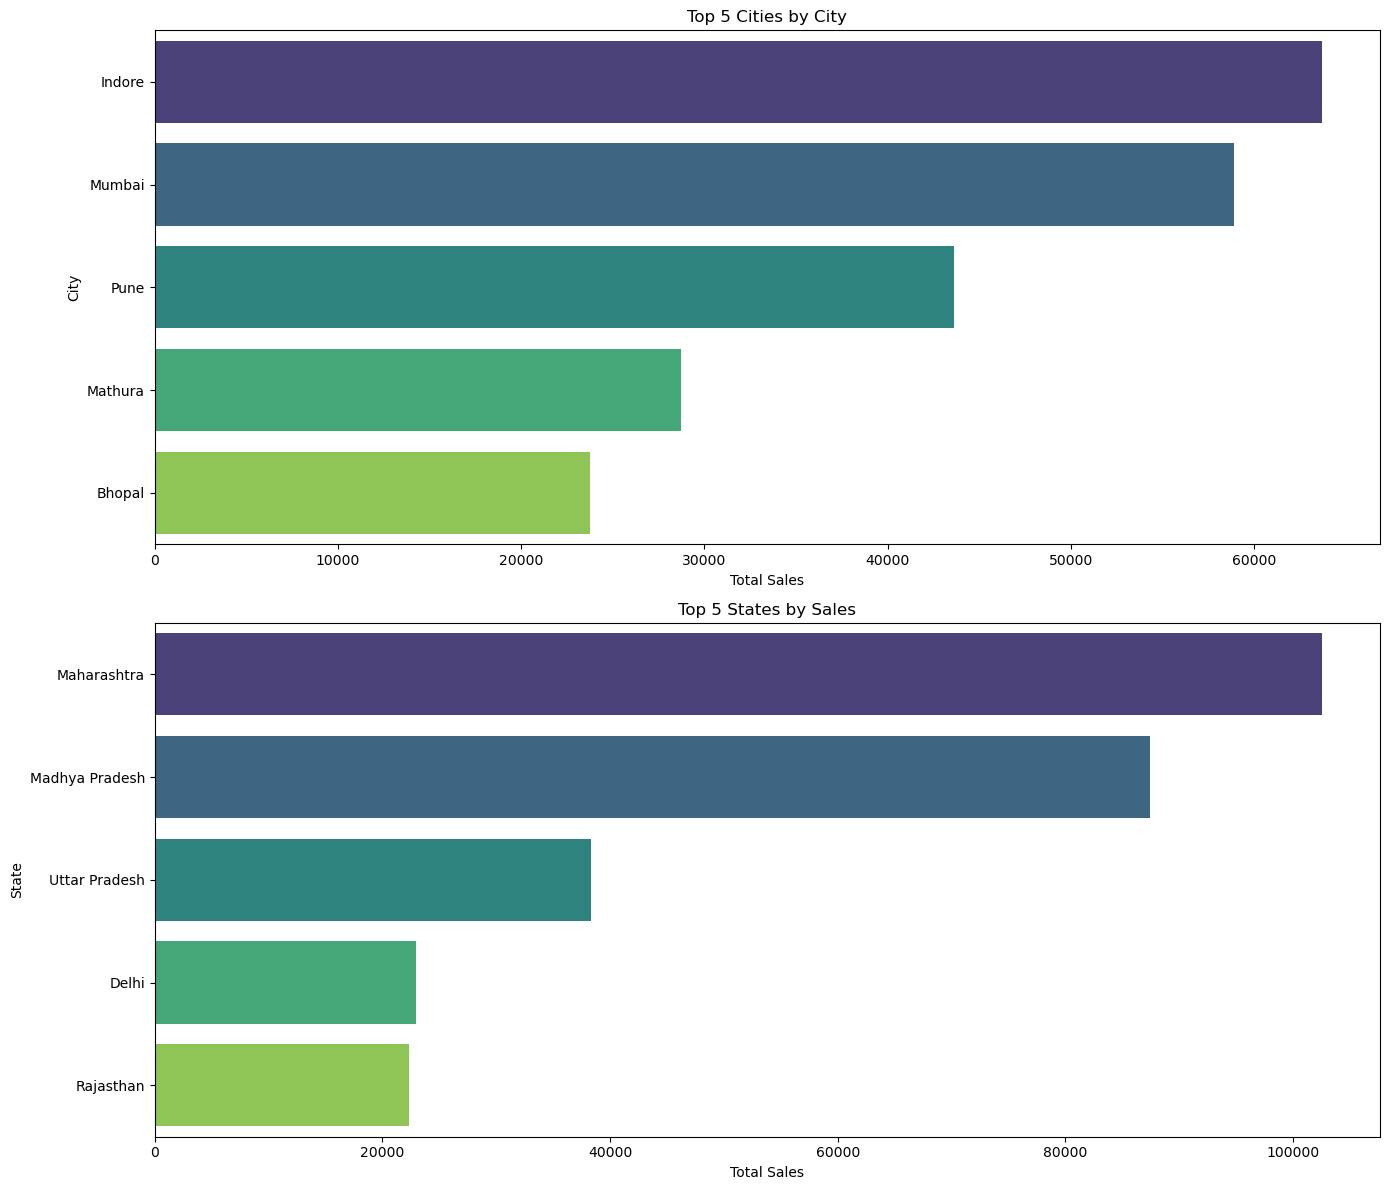

In [72]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))

# Bar chart for Sales by City
sns.barplot(x='amount', y='city', data=city_sales.head(5), ax=axes[0], palette='viridis')
axes[0].set_title('Top 5 Cities by City')
axes[0].set_xlabel('Total Sales')
axes[0].set_ylabel('City')

# Bar chart for Sales by State
sns.barplot(x='amount', y='state', data=state_sales.head(5), ax=axes[1], palette='viridis')
axes[1].set_title('Top 5 States by Sales')
axes[1].set_xlabel('Total Sales')
axes[1].set_ylabel('State')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [106]:
#load the data into sql server
import cx_Oracle

In [110]:
dsn = cx_Oracle.makedsn(host='localhost', port=1521, sid='orcl')
con = cx_Oracle.connect(user='system', password='Saibaba@1', dsn=dsn)
print(con.version)

21.3.0.0.0


In [126]:
cur=con.cursor()

In [134]:
import sqlalchemy as sal
from sqlalchemy import create_engine

In [ ]:
engine = sal.create_engine("oracle://system:Saibaba@1@localhost:1521/orcl")
conn=engine.connect()

In [ ]:
df.to_sql('df_orders', con=conn , index=False, if_exists = 'append')